# 1 神经网络

本次练习，我们将再次处理手写数字数据集。这次使用反向传播的前馈神经网络，自动学习神经网络的参数。


## 1.1 数据可视化

这部分和ex3里是一样的，5000张20*20像素的手写数字数据集，以及对应的数字（1-9，0对应10）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
from sklearn.preprocessing import OneHotEncoder


In [2]:
data = loadmat('ex4data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
X = data['X']
y = data['y']

X.shape , y.shape

((5000, 400), (5000, 1))

现在我们看一下矩阵的维度

In [4]:
weight = loadmat('ex4weights.mat')
theta1 , theta2 = weight['Theta1'] , weight['Theta2']
theta1.shape , theta2.shape

((25, 401), (10, 26))

随机展示一部分图片

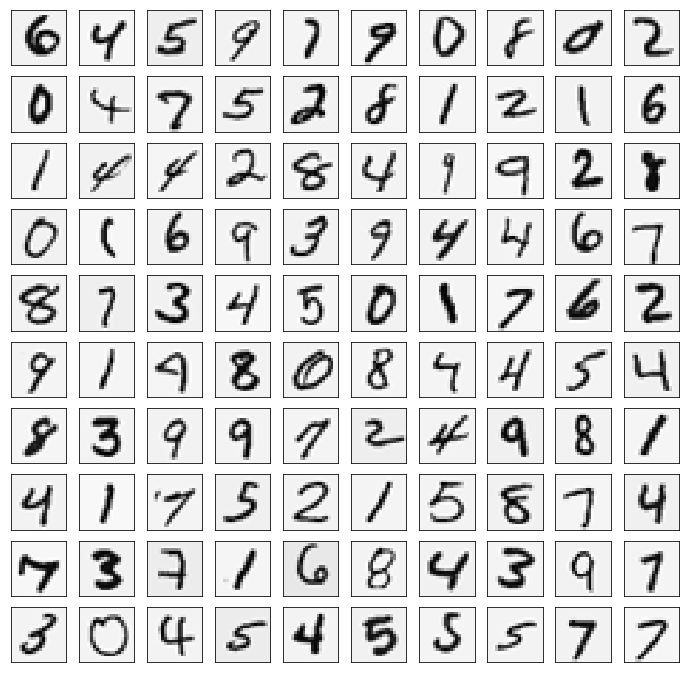

In [5]:
sample_idx = np.random.choice( np.arange(data['X'].shape[0]), 100)
sample_images = data['X'][sample_idx]
fig , ax_array = plt.subplots( nrows=10 , ncols=10 , sharey=True , sharex =True , figsize=(12,12) )

for r in range(10): 
    for c in range(10): 
        ax_array[r,c].matshow( np.array( sample_images[10*r+c].reshape( (20,20) ) ).T  , cmap = matplotlib.cm.binary )
        plt.xticks( np.array([]) )
        plt.yticks( np.array([]) )
        


## 1.2 模型展示

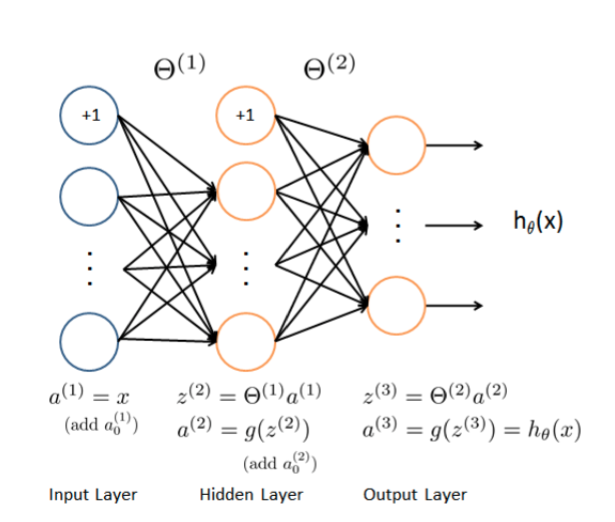 

## 1.3 前向传播和代价函数 

In [6]:
def sigmoid(z) : 
    return 1/( 1 + np.exp(-z) )


In [7]:
def forward_propagate(X , theta1 , theta2): 
    m = X.shape[0]
    
    a1 = np.insert(X , 0 , values=np.ones(m) ,axis=1)
    z2 = a1 * theta1.T
    a2 = np.insert( sigmoid(z2) , 0,values=np.ones(m) ,axis=1 )
    z3 = a2 * theta2.T 
    h = sigmoid(z3) 
    
    
    return a1 , z2 , a2 , z3 , h 


代价函数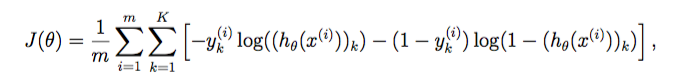

In [8]:
def cost( theta1 , theta2 , input_size , hidden_size , num_labels , X , y , learning_rate ): 
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    # 前向传播获得数据
    a1 , z2 , a2 , z3 , h = forward_propagate(X , theta1 , theta2) 
    
    J=0
    
    # 循环计算代价
    for i in range(m): 
        first_term = np.multiply(-y[i , :],np.log(h[i,:]) ) 
        second_term = np.multiply( (1-y[i,:]) , np.log(1-h[i,:]) )
        
        J +=np.sum(first_term - second_term)
        
    
    J = J/m
    
    return J




对y标签进行编码
一开始我们得到的y是$5000*1$维的向量，但我们要把他编码成$5000*10$的矩阵。
比如说，原始$y_0=2$，那么转化后的Y对应行就是[0,1,0...0]，原始$y_1=0$转化后的Y对应行就是[0,0...0,1]

Scikitlearn有一个内置的编码函数，我们可以使用这个。 

In [9]:
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)
y_onehot.shape

/Users/chenchangming/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(5000, 10)

In [10]:
y[0] , y_onehot[0] # 注： y0的数字是0

(array([10], dtype=uint8), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

初始化

In [11]:
input_size = 400
hidden_size = 25
num_labels = 10
learning_rate = 1

In [12]:
cost(theta1 , theta2 , input_size , hidden_size , num_labels , X , y_onehot , learning_rate)


0.2876291651613188

##  1.4 正则化代价函数

正则化代价函数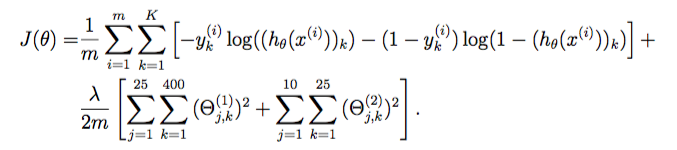

要求：你的代码需要满足任何大小的$\Theta^{(1)}$以及$\Theta^{(2)}$

In [13]:
def costReg(theta1 , theta2 , input_size , hidden_size , num_labels , X , y , learming_rate): 
    
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    # 前向传播
    a1 , z2 , a2 , z3 , h = forward_propagate(X , theta1 , theta2) 
    
    J=0
    
    # 计算梯度
    for i in range(m): 
        first_term = np.multiply(-y[i , :],np.log(h[i,:]) ) 
        second_term = np.multiply( (1-y[i,:]) , np.log(1-h[i,:]) )
        
        J+=np.sum(first_term - second_term)
        
    
    J = J/m
    
    # 加入正则项
    J+= ( float(learming_rate) / (2*m) * (np.sum( np.power(theta1[:,1:],2) ) + np.sum(np.power(theta2[:,1:],2)) )) 
    
    return J
    

In [14]:
costReg(theta1 , theta2 , input_size , hidden_size , num_labels , X , y_onehot , learning_rate)

0.38376985909092354

# 2 反向传播
这一部分需要我们实现反向传播的算法，来计算神经网络代价函数的梯度。获得了梯度的数据，我们就可以使用工具库来计算代价函数的最小值。
## 2.1 sigmoid梯度
你需要实现sigmoid函数的梯度，公式如下：
$$
g'(z)=\frac{d}{dz}g(z)=g(z)(1-g(z))
$$
其中
$$
sigmoid(z)=g(z)=\frac{1}{1+e^{-z}}
$$
在绝对值比较大的数上，梯度应该接近0，当$z=0$时，梯度应该是0.25
另外，这个函数应该可以作用于向量以及矩阵，作用在矩阵上时，应该是计算每个元素的梯度

## 这里附上一些相关的公式及推导过程：  

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$


#### 反向传播公式  
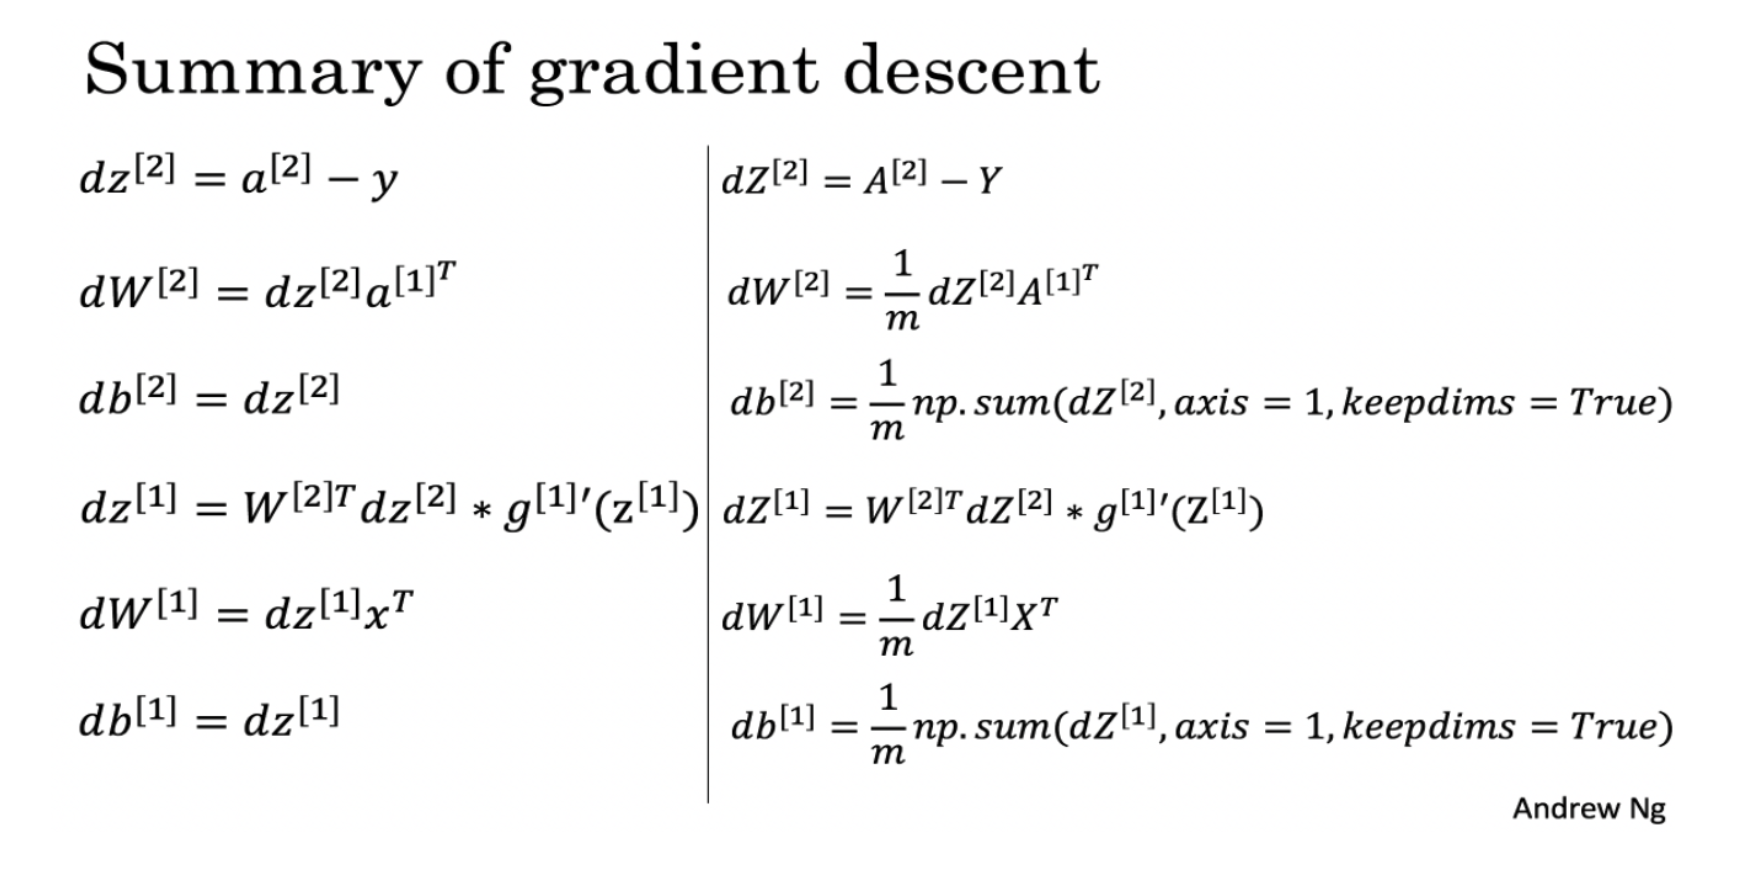

相信有了上面的这些提示，你应该可以理解反向传播的原理了。  
试着在草稿纸上自己推导一下。 

In [15]:
def sigmoid_gradient(z): 
    return np.multiply( sigmoid(z) ,( 1-sigmoid(z) )  )


In [16]:
sigmoid_gradient(0)

0.25

## 2.2 随机开始

当我们训练神经网络的时候，需要将$\Theta^{(l)}$设定为$\{-\epsilon _{init},\epsilon _{init}\}$之间的随机值。此处我们设定$\epsilon _{init}=0.12$
这个范围保证了参数足够小，使参数学习更高效  


In [17]:
params = ( np.random.random(size=hidden_size*(input_size+1) + num_labels*(hidden_size+1))-0.5)*0.24


In [18]:
params

array([ 0.02262761, -0.02464797,  0.07546593, ...,  0.10438825,
       -0.03803023, -0.10163903])

## 2.3 反向传播

反向传播的步骤是，给定训练集$(x^{(t},y^{(t)})$，先计算正向传播$h_\Theta(x)$，再对于$l$层的每个节点$j$，计算误差项$\delta_j^{(l)}$，这个数据衡量这个节点对最后输出的误差“贡献”了多少。
对于每个输出节点，我们可以直接计算输出值与目标值的差值，定义为$\delta_j^{(3)}$。对于每个隐藏节点，需要基于现有权重及$(l+1)$层的误差，计算$\delta_j^{(l)}$

In [19]:
def backprop( params , input_size , hidden_size , num_labels , X , y , lexrning_rate ): 
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    # 还原参数矩阵
    theta1 = np.matrix( np.reshape( params[:hidden_size * (input_size+1)] , ( hidden_size , (input_size+1) ) ) )
    theta2 = np.matrix( np.reshape( params[ hidden_size * (input_size+1) : ] , (num_labels , ( hidden_size+1 ) ) ) )
    
    # 前向传播
    a1, z2 , a2 , z3 , h = forward_propagate(X , theta1 , theta2 )
    
    
    # 初始化
    J = 0
    delta1 = np.zeros(theta1.shape)  # (25, 401)
    delta2 = np.zeros(theta2.shape)  # (10, 26)
    
    # 计算代价
    for i in range(m): 
        first_term = np.multiply( -y[i,:],np.log(h[i,:]) )
        second_term = np.multiply( (1-y[i,:]),np.log(1-h[i,:]) )
        J+= np.sum(first_term - second_term)
        
    J = J / m

    # 执行反向传播，计算梯度
    for t in range(m): 
        a1t = a1[t,:]
        z2t = z2[t,:]
        a2t = a2[t,:]
        ht = h[t,:]
        yt = y[t,:]
        
        
        d3t = ht - yt
        
        z2t = np.insert(z2t, 0 , values=np.ones(1))
        d2t = np.multiply( (theta2.T * d3t.T).T , sigmoid_gradient(z2t) )
        
        
        delta1 = delta1 + (d2t[:,1:]).T * a1t
        delta2 = delta2 + d3.T * a2t
    
    delta1 = delta1 / m
    delta2 = delta2 / m
    
    
    return J , delta1 , delta2
        
    

## 2.4 梯度校验
进行梯度校验是，你需要把$\Theta^{(1)},\Theta^{(2)}$连接成一个长向量$\theta$。之后你可以使用如下公式计算$\frac{\partial}{\partial \theta _i}j(\theta)$:
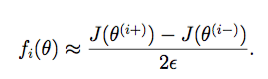
如果你的反向传播计算正确，那你得出的这个数字应该小于10e-9

不过运行比较慢 ， 这里就不做了

## 2.5 正则化神经网络
加入正则项的反向传播

In [20]:
def backpropReg( params , input_size , hidden_size , num_labels , X , y , lexrning_rate ): 
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    theta1 = np.matrix( np.reshape( params[:hidden_size * (input_size+1)] , ( hidden_size , (input_size+1) ) ) )
    theta2 = np.matrix( np.reshape( params[ hidden_size * (input_size+1) : ] , (num_labels , ( hidden_size+1 ) ) ) )
    
    # 前向传播
    a1, z2 , a2 , z3 , h = forward_propagate(X , theta1 , theta2 )
    
    # 初始化
    J = 0;
    delta1 = np.zeros(theta1.shape)
    delta2 = np.zeros(theta2.shape)
    
    # 计算代价
    for i in range(m): 
        first_term = np.multiply( -y[i,:],np.log(h[i,:]) )
        second_term = np.multiply( (1-y[i,:]),np.log(1-h[i,:]) )
        J+= np.sum(first_term - second_term)
        
    J = J / m

    
    J+= ( float(learning_rate) / (2*m)) * (np.sum( np.power( theta1[:,1:] , 2 ) ) + np.sum( np.power( theta2[:,1:], 2 ) ) )  
    
    # 反向传播 计算梯度
    for t in range(m): 
        a1t = a1[t,:]
        z2t = z2[t,:]
        a2t = a2[t,:]
        ht = h[t,:]
        yt = y[t,:]
        
        
        d3t = ht - yt
        
        z2t = np.insert(z2t, 0 , values=np.ones(1))
        d2t = np.multiply( (theta2.T * d3t.T).T , sigmoid_gradient(z2t) )
        
        
        delta1 = delta1 + (d2t[:,1:]).T * a1t
        delta2 = delta2 + d3t.T * a2t
    
    delta1 = delta1 / m
    delta2 = delta2 / m
    
    # 加入正则化项
    delta1[:,1:] = delta1[:,1:] + ( theta1[:,1:] *learning_rate ) / m
    delta2[:,1:] = delta2[:,1:] + ( theta2[:,1:] *learning_rate ) / m
    
    # 分解参数为单个数组
    grad = np.concatenate( (np.ravel(delta1) , np.ravel(delta2 ) ) )
    
    
    return J , grad
        
    

## 2.6 使用工具库计算参数最优解

In [21]:
from scipy.optimize import minimize

# 工具库-> 最小化代价
fmin = minimize(fun=backpropReg, x0=(params), args=(input_size, hidden_size, num_labels ,X, y_onehot, learning_rate),
                method='TNC', jac=True, options={'maxiter': 250})
fmin



     fun: 0.33735698660688174
     jac: array([ 8.42498836e-05,  1.97100443e-07, -6.57357841e-07, ...,
        8.98663155e-05,  2.03844479e-05,  3.17512577e-05])
 message: 'Max. number of function evaluations reached'
    nfev: 251
     nit: 21
  status: 3
 success: False
       x: array([-6.74205878e-02,  9.85502216e-04, -3.28678920e-03, ...,
       -1.13607927e+00, -9.58555996e-01, -1.43578653e+00])

In [22]:
X = np.matrix(X)
thetafinal1 = np.matrix(np.reshape(fmin.x[:hidden_size*(input_size+1)] , (hidden_size,(input_size+1))  )  )
thetafinal2 = np.matrix(np.reshape(fmin.x[hidden_size*(input_size+1):],(num_labels, (hidden_size+1))  )  )


In [23]:
# 用训练后的参数  做出预测
a1 , z2 , a2 , z3 , h = forward_propagate(X , thetafinal1 , thetafinal2)  

y_pred = np.array( np.argmax(h,axis=1)+1 )
y_pred

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]])

查看计算的准确度

In [25]:
from sklearn.metrics import classification_report
print( classification_report(y, y_pred) )

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       500
           2       0.99      1.00      1.00       500
           3       0.99      0.99      0.99       500
           4       1.00      0.99      0.99       500
           5       1.00      1.00      1.00       500
           6       1.00      1.00      1.00       500
           7       0.99      0.99      0.99       500
           8       0.99      1.00      1.00       500
           9       0.99      0.98      0.99       500
          10       0.99      1.00      0.99       500

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



# 3 可视化隐藏层

In [26]:
hidden_layer = thetafinal1[:,1:]
hidden_layer.shape

(25, 400)

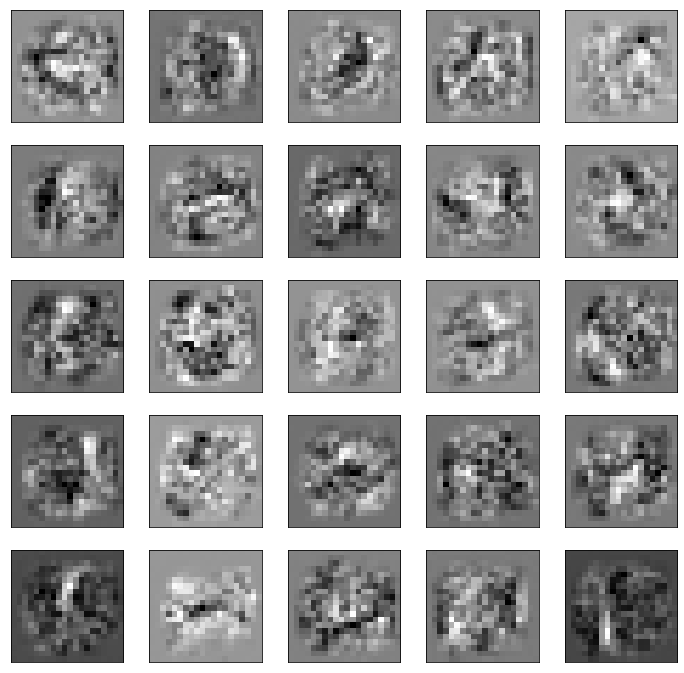

In [27]:
fig , ax_array = plt.subplots( nrows=5 , ncols=5 , sharey=True , sharex =True , figsize=(12,12) )

for r in range(5): 
    for c in range(5): 
        ax_array[r,c].matshow( np.array( hidden_layer[5*r+c].reshape( (20,20) ) ) , cmap = matplotlib.cm.binary )
        plt.xticks( np.array([]) )
        plt.yticks( np.array([]) )